# Assignment 2

## *The adverse health effects of air pollution - are we making any progress?*

<p><img src=files/air.jpg width="900"></p>
<p><strong>Credit:</strong>  <a href="https://www.flickr.com/people/44221799@N08/">Flickr/E4C</a> </p>

In [1]:
# Load relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm
import warnings
import re

warnings.filterwarnings("ignore")  # Suppress all warnings

<h2>Introduction</h2>
<p><strong>Business Context.</strong> Air pollution is a very serious issue that the global population is currently dealing with. The abundance of air pollutants is not only contributing to global warming, but it is also causing problematic health issues to the population. There have been numerous efforts to protect and improve air quality across most nations. However, it seems that we are making very little progress. One of the main causes of this is the fact that the majority of air pollutants are derived from the burning of fossil fuels such as <em>coal</em>. Big industries and several other economical and political factors have slowed the progress towards the use of renewable energy by promoting the use of fossil fuels. Nevertheless, if we educate the general population and create awareness of this issue, we will be able to overcome this problem in the future.      </p>
<p>For this case, you have been hired as a data science consultant for an important environmental organization. In order to promote awareness of environmental and greenhouse gas issues, your client is interested in a study of <strong>plausible impacts of air contamination on the health of the global population</strong>. They have gathered some <em>raw</em> data provided by the <a href="https://www.who.int/">World Health Organization</a>, <a href="http://www.healthdata.org/">The Institute for Health Metrics and Evaluation</a> and the <a href="https://www.worldbank.org/">World Bank Group</a>. Your task is to conduct data analysis, search for potential information, and create visualizations that the client can use for their campaigns and grant applications. </p>
<p><strong>Analytical Context.</strong> You are given a folder, named <code>files</code> with <em>raw</em> data. This data contains quite a large number of variables and it is in a fairly disorganized state. In addition, one of the datasets contains very poor documentation, segmented into several datasets. Your objective will be to:</p>
<ol>
<li>Extract and clean the relevant data. You will have to manipulate several datasets to obtain useful information for the case. </li>
<li>Conduct Exploratory Data Analysis. You will have to create meaningful plots, formulate meaningful hypotheses and study the relationship between various indicators related to air pollution.</li>
</ol>
<p>Additionally, the client has some broad questions they would like to answer:<br />
1. Are we making any progress in reducing the amount of emitted pollutants across the globe?<br />
2. Which are the critical regions where we should start environmental campaigns?<br />
3. Are we making any progress in the prevention of deaths related to air pollution?<br />
4. Which demographic characteristics seem to correlate with the number of health-related issues derived from air pollution? </p>

<h2>Extracting and cleaning relevant data</h2>
<p>Let's take a look at the data provided by the client in the <code>files</code> folder. There, we see another folder  named <code>WDI_csv</code> with several CSV files corresponding to the World Bank's primary <a href="https://datacatalog.worldbank.org/dataset/world-development-indicators">World Development Indicators</a>. The client stated that this data may contain some useful information relevant to our study, but they have not told us anything aside from that. Thus, we are on our own in finding and extracting the relevant data for our study. This we will do next. </p>
<p>Let's take a peek at the file <code>WDIData.csv</code>:</p>

In [2]:
WDI_data = pd.read_csv("./files/WDI_csv/WDIData.csv")
print(WDI_data.columns)
print(WDI_data.info())
WDI_data.head()

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', 'Unnamed: 64'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377256 entries, 0 to 377255
Data columns (total 65 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    377256 non-null  object 
 1   Country Code    377256 non-null  object 
 2   Indicator Name  377256 non-null  object 
 3   Indicator Co

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
0,Arab World,ARB,"2005 PPP conversion factor, GDP (LCU per inter...",PA.NUS.PPP.05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"2005 PPP conversion factor, private consumptio...",PA.NUS.PRVT.PP.05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,82.783289,83.120303,83.533457,83.897596,84.171599,84.510171,NaN,NaN,NaN,NaN
3,Arab World,ARB,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,86.428272,87.070576,88.176836,87.342739,89.130121,89.678685,90.273687,NaN,NaN,NaN
4,Arab World,ARB,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,73.942103,75.244104,77.162305,75.538976,78.741152,79.665635,80.749293,NaN,NaN,NaN


<p>The data seems to have a large number of indicators dating from 1960. There are also columns containing country names and codes. Notice that the first couple of rows say <code>Arab World</code>, which may indicate that the data contains broad regional data as well. We notice also that there are at least 100,000 entries with <code>NaN</code> values for each year column.</p>
<p>Since we are interested in environmental indicators, we must get rid of any rows not relevant to our study. However, the number of indicators seems to be quite large and a manual inspection seems impossible. Let's load the file <code>WDISeries.csv</code> which seems to contain more information about the indicators:</p>

In [3]:
WDI_ids = pd.read_csv("./files/WDI_csv/WDISeries.csv")
print(WDI_ids.columns)
WDI_ids.head()

Index(['Series Code', 'Topic', 'Indicator Name', 'Short definition',
       'Long definition', 'Unit of measure', 'Periodicity', 'Base Period',
       'Other notes', 'Aggregation method', 'Limitations and exceptions',
       'Notes from original source', 'General comments', 'Source',
       'Statistical concept and methodology', 'Development relevance',
       'Related source links', 'Other web links', 'Related indicators',
       'License Type', 'Unnamed: 20'],
      dtype='object')


,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,AG.AGR.TRAC.NO,Environment: Agricultural production,"Agricultural machinery, tractors",NaN,Agricultural machinery refers to the number of...,NaN,Annual,NaN,NaN,Sum,...,NaN,NaN,"Food and Agriculture Organization, electronic ...",A tractor provides the power and traction to m...,Agricultural land covers more than one-third o...,NaN,NaN,NaN,CC BY-4.0,NaN
1,AG.CON.FERT.PT.ZS,Environment: Agricultural production,Fertilizer consumption (% of fertilizer produc...,NaN,Fertilizer consumption measures the quantity o...,NaN,Annual,NaN,NaN,Weighted average,...,NaN,NaN,"Food and Agriculture Organization, electronic ...",Fertilizer consumption measures the quantity o...,"Factors such as the green revolution, has led ...",NaN,NaN,NaN,CC BY-4.0,NaN
2,AG.CON.FERT.ZS,Environment: Agricultural production,Fertilizer consumption (kilograms per hectare ...,NaN,Fertilizer consumption measures the quantity o...,NaN,Annual,NaN,NaN,Weighted average,...,NaN,NaN,"Food and Agriculture Organization, electronic ...",Fertilizer consumption measures the quantity o...,"Factors such as the green revolution, has led ...",NaN,NaN,NaN,CC BY-4.0,NaN
3,AG.LND.AGRI.K2,Environment: Land use,Agricultural land (sq. km),NaN,Agricultural land refers to the share of land ...,NaN,Annual,NaN,NaN,Sum,...,NaN,NaN,"Food and Agriculture Organization, electronic ...",Agricultural land constitutes only a part of a...,Agricultural land covers more than one-third o...,NaN,NaN,NaN,CC BY-4.0,NaN
4,AG.LND.AGRI.ZS,Environment: Land use,Agricultural land (% of land area),NaN,Agricultural land refers to the share of land ...,NaN,Annual,NaN,NaN,Weighted average,...,NaN,NaN,"Food and Agriculture Organization, electronic ...",Agriculture is still a major sector in many ec...,Agricultural land covers more than one-third o...,NaN,NaN,NaN,CC BY-4.0,NaN


<p>Bingo! The <code>WDI_ids</code> DataFrame contains a column named <code>Topic</code>. Moreover, it seems that <em>Environment</em> is listed as a key topic in the column.</p>

<h3>Exercise 1:</h3>
<p>Extract all the rows that have the topic key <em>Environment</em> in <code>WDI_ids</code>. Add to the resulting DataFrame a new column named <code>Subtopic</code> which contains the corresponding subtopic of the indicator. For example, the subtopic of <code>Environment: Agricultural production</code> is <code>Agricultural production</code>. Which subtopics do you think are of interest to us?</p>
<p><strong>Hint:</strong> Remember that you can apply string methods to Series using the <code>str()</code> method of <code>pandas</code>. </p>

**Answer.**
Interesting subtopics:

Freshwater,Transportation,Energy production & use,Emissions,Biodiversity & protected areas,Density & urbanization'

-------

In [4]:
def subtop(s):
    y=s.rfind(":")+1
    return s[y:]

In [5]:
WDI_ids["subtopic"]=WDI_ids["Topic"].apply(lambda x:subtop(x))
WDI_ids.subtopic.unique()[:20]

array([' Agricultural production', ' Land use',
       ' Goods, services & income', ' Capital & financial account',
       ' Transfers', ' Balances', ' Reserves & other items',
       ' Communications', ' Capital markets',
       ' Official development assistance', ' Debt outstanding',
       ' Debt ratios & other items', ' Net flows', ' Debt service',
       'World Bank, International Debt Statistics.',
       ' Energy production & use', ' Emissions',
       ' Biodiversity & protected areas', ' Density & urbanization',
       ' Transportation'], dtype=object)

<h3>Exercise 2:</h3>
<p>Use the results of Exercise 1 to create a new DataFrame with the history of all emissions indicators for countries and major regions. Call this new DataFrame <code>Emissions_df</code>. How many emissions indicators are in the study?</p>

**Answer.**
There are 42 indicators

-------

In [6]:
e=WDI_ids[WDI_ids["subtopic"]==" Emissions"]

In [7]:
d=e["Indicator Name"]
d=list(d)


In [8]:
len(d)

42

In [9]:
Emissions_df=WDI_data[WDI_data["Indicator Name"].apply(lambda x:x in d)]
Emissions_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
64,Arab World,ARB,Agricultural methane emissions (% of total),EN.ATM.METH.AG.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65,Arab World,ARB,Agricultural methane emissions (thousand metri...,EN.ATM.METH.AG.KT.CE,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66,Arab World,ARB,Agricultural nitrous oxide emissions (% of total),EN.ATM.NOXE.AG.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67,Arab World,ARB,Agricultural nitrous oxide emissions (thousand...,EN.ATM.NOXE.AG.KT.CE,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
191,Arab World,ARB,CO2 emissions (kg per 2010 US$ of GDP),EN.ATM.CO2E.KD.GD,NaN,NaN,NaN,NaN,NaN,NaN,...,0.757162,0.770413,0.737665,0.769023,NaN,NaN,NaN,NaN,NaN,NaN


<h3>Exercise 3:</h3>
<p>The DataFrame <code>Emissions_df</code> has one column per year of observation. Data in this form is usually referred to as data in <em>wide format</em>, as the number of columns is high. However, it might be easier to query and filter the data if we had a single column containing the year in which each indicator was calculated. This way, <em>each observation will be represented by a single row</em>. Use the <code>pandas</code> function <a href="https://pandas.pydata.org/docs/reference/api/pandas.melt.html"><code>melt()</code></a> to reshape the <code>Emissions_df</code> data into <em>long format</em>. The resulting DataFrame should contain a pair of new columns named <code>Year</code> and <code>Indicator Value</code>:</p>

**Answer.**

-------

In [10]:
keep=list(Emissions_df.columns)[0:4]
co=list(Emissions_df.columns)

In [11]:
del co[0:4]

In [12]:
tb=Emissions_df.melt(id_vars=keep,value_vars=co,var_name=["Year"])
tb.head()

,Country Name,Country Code,Indicator Name,Indicator Code,Year,value
0,Arab World,ARB,Agricultural methane emissions (% of total),EN.ATM.METH.AG.ZS,1960,NaN
1,Arab World,ARB,Agricultural methane emissions (thousand metri...,EN.ATM.METH.AG.KT.CE,1960,NaN
2,Arab World,ARB,Agricultural nitrous oxide emissions (% of total),EN.ATM.NOXE.AG.ZS,1960,NaN
3,Arab World,ARB,Agricultural nitrous oxide emissions (thousand...,EN.ATM.NOXE.AG.KT.CE,1960,NaN
4,Arab World,ARB,CO2 emissions (kg per 2010 US$ of GDP),EN.ATM.CO2E.KD.GD,1960,NaN


In [13]:
Emissions_df=tb.copy()

<h3>Exercise 4:</h3>
<p>The column <code>Indicator Value</code> of the new <code>Emissions_df</code> contains a bunch of <code>NaN</code> values. Additionally, the <code>Year</code> column contains an <code>Unnamed: 64</code> value. What procedure should we follow to clean these missing values in our DataFrame? Proceed with your suggested cleaning process.</p>

**Answer.**

Because the columns "Unnamed: 64" contains only Nan values, so the column can be deleted.

Another NaN years could be removed , because i wont affect on our final result.


In [14]:
Emissions_df=Emissions_df[Emissions_df["Year"]!="Unnamed: 64"]


<h3>Exercise 5:</h3>
<p>Split the <code>Emissions_df</code> into two DataFrames, one containing only countries and the other containing only regions. Name these <code>Emissions_C_df</code> and <code>Emissions_R_df</code> respectively.</p>
<p><strong>Hint:</strong> You may want to inspect the file <code>WDICountry.csv</code> for this task. Region country codes may be found by looking at <code>null</code> values of the <code>Region</code> column in <code>WDICountry</code>.</p>

**Answer.**

-------

In [15]:
WDI_country = pd.read_csv("./files/WDI_csv/WDICountry.csv")

# Generate a dictionary for region from WDI country table

In [16]:
cc=WDI_country["Country Code"]
rg=WDI_country["Region"]

In [17]:
res = dict(zip(cc, rg))

In [18]:
tb["Region"]=tb["Country Code"].map(res)


In [19]:
Emissions_df=tb.copy()

# Region was created

In [20]:
Emissions_df=Emissions_df[Emissions_df['Region'].notna()]

In [21]:
Emissions_C_df=Emissions_df.drop("Region",axis=1)

In [22]:
Emissions_C_df=Emissions_C_df[Emissions_C_df["Year"]!="Unnamed: 64"]

# sum up all same indicator of countries's value in same region

In [23]:
Emissions_df=Emissions_df[Emissions_df["Year"]!="Unnamed: 64"]

In [24]:
Emissions_R_df=Emissions_df.copy()

In [25]:
aa=Emissions_R_df.groupby(["Region","Indicator Name","Year"])["value"].sum().reset_index()

aa

,Region,Indicator Name,Year,value
0,East Asia & Pacific,Agricultural methane emissions (% of total),1960,0.0
1,East Asia & Pacific,Agricultural methane emissions (% of total),1961,0.0
2,East Asia & Pacific,Agricultural methane emissions (% of total),1962,0.0
3,East Asia & Pacific,Agricultural methane emissions (% of total),1963,0.0
4,East Asia & Pacific,Agricultural methane emissions (% of total),1964,0.0
...,...,...,...,...
17635,Sub-Saharan Africa,Total greenhouse gas emissions (kt of CO2 equi...,2015,0.0
17636,Sub-Saharan Africa,Total greenhouse gas emissions (kt of CO2 equi...,2016,0.0
17637,Sub-Saharan Africa,Total greenhouse gas emissions (kt of CO2 equi...,2017,0.0
17638,Sub-Saharan Africa,Total greenhouse gas emissions (kt of CO2 equi...,2018,0.0


In [26]:
Emissions_R_df=aa

In [27]:
# Emissions_R_df=Emissions_df.drop(["Country Code","Country Name"],axis=1)

## final Emission_R_df

In [28]:
Emissions_R_df.head()

,Region,Indicator Name,Year,value
0,East Asia & Pacific,Agricultural methane emissions (% of total),1960,0.0
1,East Asia & Pacific,Agricultural methane emissions (% of total),1961,0.0
2,East Asia & Pacific,Agricultural methane emissions (% of total),1962,0.0
3,East Asia & Pacific,Agricultural methane emissions (% of total),1963,0.0
4,East Asia & Pacific,Agricultural methane emissions (% of total),1964,0.0


<h2>Finalizing the cleaning for our study</h2>
<p>Our data has improved a lot by now. However, since the number of indicators is still quite large, let us focus our study on the following indicators for now:</p>
<ul>
<li>
<p><strong>Total greenhouse gas emissions (kt of CO2 equivalent), EN.ATM.GHGT.KT.CE</strong>: The total of greenhouse emissions includes CO2, Methane, Nitrous oxide, among other pollutant gases. Measured in kilotons.</p>
</li>
<li>
<p><strong>CO2 emissions (kt), EN.ATM.CO2E.KT</strong>: Carbon dioxide emissions are those stemming from the burning of fossil fuels and the manufacture of cement. They include carbon dioxide produced during consumption of solid, liquid, and gas fuels and gas flaring.  </p>
</li>
<li>
<p><strong>Methane emissions (kt of CO2 equivalent), EN.ATM.METH.KT.CE</strong>: Methane emissions are those stemming from human activities such as agriculture and from industrial methane production.</p>
</li>
<li>
<p><strong>Nitrous oxide emissions (kt of CO2 equivalent), EN.ATM.NOXE.KT.CE</strong>: Nitrous oxide emissions are emissions from agricultural biomass burning, industrial activities, and livestock management.</p>
</li>
<li>
<p><strong>Other greenhouse gas emissions, HFC, PFC and SF6 (kt of CO2 equivalent), EN.ATM.GHGO.KT.CE</strong>: Other pollutant gases.</p>
</li>
<li>
<p><strong>PM2.5 air pollution, mean annual exposure (micrograms per cubic meter), EN.ATM.PM25.MC.M3</strong>: Population-weighted exposure to ambient PM2.5 pollution is defined as the average level of exposure of a nation's population to concentrations of suspended particles measuring less than 2.5 microns in aerodynamic diameter, which are capable of penetrating deep into the respiratory tract and causing severe health damage. Exposure is calculated by weighting mean annual concentrations of PM2.5 by population in both urban and rural areas.</p>
</li>
<li>
<p><strong>PM2.5 air pollution, population exposed to levels exceeding WHO guideline value (% of total), EN.ATM.PM25.MC.ZS</strong>: Percent of population exposed to ambient concentrations of PM2.5 that exceed the World Health Organization (WHO) guideline value.</p>
</li>
</ul>

<h3>Exercise 6:</h3>
<p>For each of the emissions DataFrames, extract the rows corresponding to the above indicators of interest. Replace the long names of the indicators by the short names <code>Total</code>, <code>CO2</code>, <code>CH4</code>, <code>N2O</code>, <code>Other</code>, <code>PM2.5</code>, and <code>PM2.5_WHO</code>. (This will be helpful later when we need to label plots of our data.) </p>

**Answer.**

-------

In [29]:
indicatorlist=['Total greenhouse gas emissions (kt of CO2 equivalent)',
'CO2 emissions (kt)',
'Methane emissions (kt of CO2 equivalent)',
'Nitrous oxide emissions (kt of CO2 equivalent)',
'Other greenhouse gas emissions',
'PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)',
'PM2.5 air pollution, population exposed to levels exceeding WHO guideline value (% of total)']

In [30]:
tranin=['Total','CO2','CH4','N2O','Other','PM2.5','PM2.5_WHO']



In [31]:
res1 = dict(zip(indicatorlist,tranin))



In [32]:
def converti(da):
    q=[]
    for w in da["Indicator Name"]:
        if w in res1:
            q.append(res1[w])
        else:
            q.append(w)
    return q

## Shorten indicator name

In [33]:
Emissions_C_df["Indicator Name"]=converti(Emissions_C_df)
Emissions_R_df["Indicator Name"]=converti(Emissions_R_df)

<h2>Where shall the client start environmental campaigns?</h2>
<p>Now the DataFrames <code>Emissions_C_df</code> and <code>Emissions_R_df</code> seem to be in a good shape. Let's proceed to conduct some exploratory data analysis so that we can make recommendations to our client.</p>

<h3>Exercise 7:</h3>
<p>Let's first calculate some basic information about the main indicators across the globe.</p>
<h4>7.1</h4>
<p>Compute some basic statistics of the amount of kt of emissions for each of the four main pollutants (<code>CO2, CH4, N2O, Others</code>) over the years. Use the <code>Emissions_C_df</code> data frame. What trends do you see? </p>

**Answer.**

-------
# CO2 trend is increasing from 1960 to 2010
# CH4 trend is increasing from 1970 to 2010

In [34]:
for i in tranin:
    a=Emissions_C_df[Emissions_C_df["Indicator Name"]==i].describe()
    print("Basic statistics of :",i)
    print(a)

Basic statistics of : Total
              value
count  8.061000e+03
mean   1.981796e+05
std    6.933496e+05
min    1.390210e+00
25%    6.392453e+03
50%    3.123402e+04
75%    1.108790e+05
max    1.245471e+07
Basic statistics of : CO2
              value
count  9.856000e+03
mean   1.004811e+05
std    4.950942e+05
min   -8.067400e+01
25%    5.573840e+02
50%    4.275722e+03
75%    4.008581e+04
max    1.029193e+07
Basic statistics of : CH4
              value
count  8.736000e+03
mean   3.190019e+04
std    1.049856e+05
min    0.000000e+00
25%    8.806212e+02
50%    5.457505e+03
75%    1.932534e+04
max    1.752290e+06
Basic statistics of : N2O
       value
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Basic statistics of : Other
       value
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Basic statistics of : PM2.5
             value
count  2328.000000
mean     28.133282
std    

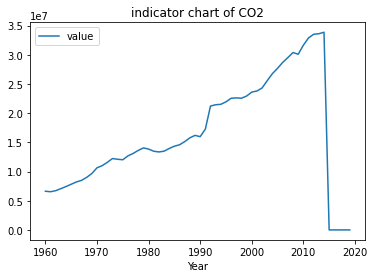

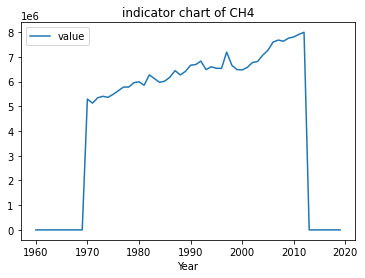

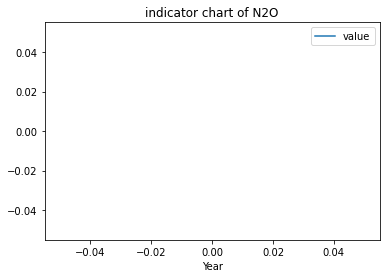

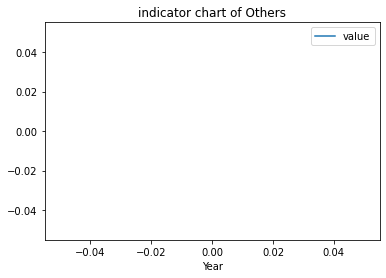

In [210]:
listin=["CO2","CH4","N2O","Others"]
Emissions_C_df["Year"]=Emissions_C_df["Year"].astype(int)
for t in listin:
    Emissions_C_df[Emissions_C_df["Indicator Name"]==t].groupby("Year").sum().plot(title="indicator chart of "+t)

In [36]:
# Emissions_C_df[Emissions_C_df["Indicator Name"]=="CH4"].groupby("Year").sum().plot()

<h4>7.2</h4>
<p>What can you say about the <em>distribution</em> of emissions around the globe over the years? What information can you extract from the <em>tails</em> of these distributions over the years?</p>

**Answer.**
# The tail distribution was deleted, or sensored

-------

<h4>7.3</h4>
<p>Compute a plot showing the behavior of each of the four main air pollutants for each of the main global regions in the <code>Emissions_R_df</code> data frame. The main regions are <code>'Latin America &amp; Caribbean', 'South Asia', 'Sub-Saharan Africa', 'Europe &amp; Central Asia', 'Middle East &amp; North Africa', 'East Asia &amp; Pacific'</code> and <code>'North America'</code>. What conclusions can you make?</p>

**Answer.**

# from 2000 to 2018 , East Asia and Pacific regions increased rapidly in the emission of CO2 ,and CH4. 

In [37]:
regionlist=Emissions_R_df["Region"].unique()

In [38]:
Emissions_R_df["Year"]=Emissions_R_df["Year"].astype(int)

In [39]:
listin

['CO2', 'CH4', 'N2O', 'Others']

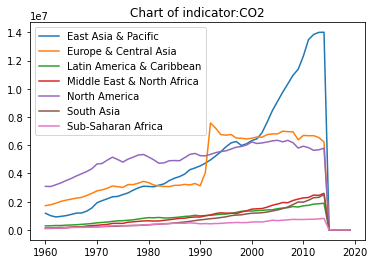

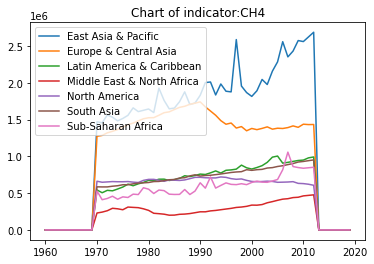

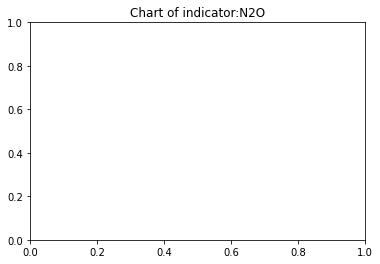

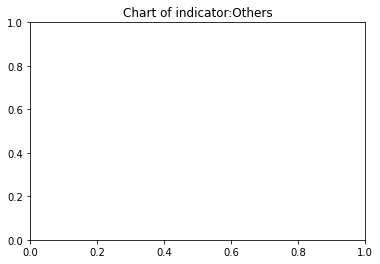

In [40]:

for t in listin:
    for i in regionlist:
        tit="indicator"+t+"in region of "+ i
        if len(Emissions_R_df[(Emissions_R_df["Indicator Name"]==t)&(Emissions_R_df["Region"]==i)])>0:
            ab=Emissions_R_df[(Emissions_R_df["Indicator Name"]==t)&(Emissions_R_df["Region"]==i)]
            plt.plot(ab["Year"].astype(int),ab['value'],label=i)
            plt.legend(loc="upper left")
    plt.title("Chart of indicator:"+t)
    plt.show()
            

-------

<p>It seems that countries in East Asia and the Pacific are the worst dealing with pollutant emissions. We also see that Europe and Central Asia have been making some efforts to reduce their emissions. Surprisingly this is not the case with North America and Sub-Saharan Africa, which levels have been increasing over the years as well. </p>

<h3>Exercise 8:</h3>
<p>In Exercise 7 we discovered some interesting features of the distribution of the emissions over the years. Let us explore these features in more detail. </p>

<h4>8.1</h4>
<p>Which are the top five countries that have been in the top 10 of <code>CO2</code> emitters over the years? Have any of these countries made efforts to reduce the amount of CO2 emissions over the last 10 years?</p>

**Answer.**
## That is China,US, Russia, Japan,France,India

## Yes, There are. From 2004, US began reduce its CO2 emissions.

## Scince 2007, Russian started reducing CO2 emissions.Japans as well

-------

In [41]:
yl=Emissions_C_df["Year"].unique()
table=pd.DataFrame()

In [42]:
countrylist=Emissions_C_df["Country Name"].unique()

In [43]:
dd=Emissions_C_df[Emissions_C_df["Indicator Name"]=="CO2"].groupby("Year")
for i in yl:
    a=dd.get_group(i).sort_values(by="value",ascending=False).head(10)
    table[i]=a["Country Code"].to_list()



In [44]:
table.iloc[0:5:,20:60]

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,USA,USA,USA,USA,USA,USA,USA,USA,USA,USA,...,CHN,CHN,CHN,CHN,CHN,AFG,AFG,AFG,AFG,AFG
1,CHN,CHN,CHN,CHN,CHN,CHN,CHN,CHN,CHN,CHN,...,USA,USA,USA,USA,USA,ALB,ALB,ALB,ALB,ALB
2,JPN,JPN,JPN,JPN,JPN,JPN,JPN,JPN,JPN,JPN,...,IND,IND,IND,IND,IND,DZA,DZA,DZA,DZA,DZA
3,GBR,GBR,GBR,GBR,GBR,GBR,GBR,GBR,GBR,GBR,...,RUS,RUS,RUS,RUS,RUS,ASM,ASM,ASM,ASM,ASM
4,FRA,FRA,FRA,FRA,POL,POL,IND,IND,IND,IND,...,JPN,JPN,JPN,JPN,JPN,AND,AND,AND,AND,AND


<h4>8.2</h4>
<p>Are these five countries carrying out the burden of most of the emissions emitted over the years globally? Can we say that the rest of the world is making some effort to control their polluted gasses emissions over the years?</p>

**Answer.**

Yes , they are,but they are trying to lowering their emissions.However,we can not  say that the rest of the world is making some effort to control their polluted gasses emissions.They only stop increasing the emissions.

From the table, we can see the emissions of these contry are increasing over year. China emission is increasing rapidly.

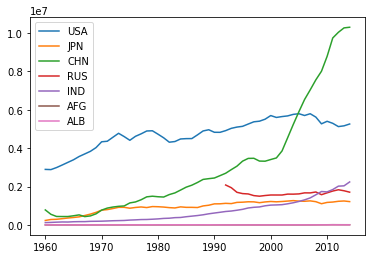

In [45]:
coutryl=["USA","JPN","CHN","RUS","IND","AFG","ALB"]

for i in coutryl:
    bb=Emissions_C_df[(Emissions_C_df["Country Code"]==i)&(Emissions_C_df["Indicator Name"]=="CO2")][['value','Year']]
    plt.plot(bb["Year"].astype(int),bb['value'],label=i)
    
    plt.legend(loc="upper left")
plt.show()


-------

<h2>The health impacts of air pollution</h2>

<h3>Exercise 9:</h3>
<p>One of the main contributions of poor health from air pollution is particulate matter. In particular, very small particles (those with a size less than 2.5 micrometres ($\mu$m)) can enter and affect the respiratory system. The <code>PM2.5</code> indicator measures the average level of exposure of a nation's population to concentrations of these small particles. The <code>PM2.5_WHO</code> measures the  percentage of the population who are exposed to ambient concentrations of these particles that exceed some thresholds set by the World Health Organization (WHO). In particular, countries with a higher <code>PM2.5_WHO</code> indicator are more likely to suffer from bad health conditions. </p>
<h4>9.1</h4>
<p>The client would like to know if there is any relationship between the <code>PM2.5_WHO</code> indicator and the level of income of the general population, as well as how this changes over time. What plot(s) might be helpful to solve the client's question?  What conclusion can you draw from your plot(s) to answer their question?</p>
<p><strong>Hint:</strong> The DataFrame <code>WDI_countries</code> contains a column named <code>Income Group</code>. </p>

**Answer.**

I used box plot to indicate the trend of PM2.5 WHO overtime. I used the linear regression to find the slope of PM2.5 WHO overtime, as the overall trend indicator.

From the plot, I found out that 75% of high income country group has negative of PM2.5_WHO. It means that the exposure of PM2.5WHO is descreased overtime. 

-------

In [46]:
gg=Emissions_C_df[(Emissions_C_df["Indicator Name"]=="PM2.5_WHO")&(Emissions_C_df["value"]>0)&(Emissions_C_df["Country Code"]=="USA")]



In [47]:
!pip install sklearn

You should consider upgrading via the 'c:\users\caoth\.virtualenvs\calculator-kbkrpklt\scripts\python.exe -m pip install --upgrade pip' command.


In [48]:
from sklearn.linear_model import LinearRegression

In [49]:
countrycode=Emissions_C_df["Country Code"].unique()

In [50]:
gg=Emissions_C_df[(Emissions_C_df["Indicator Name"]=="PM2.5_WHO")&(Emissions_C_df["value"]>0)&(Emissions_C_df["Country Code"]=="USA")]
table2=pd.DataFrame()

In [51]:
c=[]
r=[]
for i in countrycode:
    gg=Emissions_C_df[(Emissions_C_df["Indicator Name"]=="PM2.5_WHO")&(Emissions_C_df["value"]>0)&(Emissions_C_df["Country Code"]==i)]
    x=gg[["Year"]]
    y=gg[["value"]]
    if len(x)<10:
        continue
    regressor = LinearRegression()
    regressor.fit(x,y)
    slope=regressor.coef_
    w=slope.tolist()[0][0]
    c.append(i)
    r.append(w)
 


In [52]:
len(r)

191

In [53]:
table2["Country code"]=c
table2['slope of country']=r

In [54]:
e=[]
for i in table2["Country code"]:
    d=WDI_country[WDI_country["Country Code"]==i]["Income Group"].to_list()[0]
    e.append(d)
    

In [55]:
table2["Income Group"]=e

In [56]:
table2.head(10)

,Country code,slope of country,Income Group
0,AFG,0.000000e+00,Low income
1,ALB,4.616437e-13,Upper middle income
2,DZA,0.000000e+00,Upper middle income
3,ASM,0.000000e+00,Upper middle income
4,AND,-2.274640e+00,High income
5,AGO,0.000000e+00,Lower middle income
6,ATG,0.000000e+00,High income
7,ARG,-1.358244e-01,Upper middle income
8,ARM,0.000000e+00,Upper middle income
9,AUS,-2.461702e-01,High income


In [57]:
table2.drop('Country code',axis=1, inplace=True)

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='Income Group', ylabel='slope of country'>

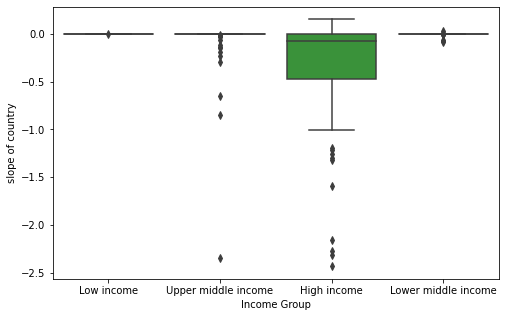

In [59]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Income Group',y='slope of country',data=table2)

<h4>9.2</h4>
<p>What do you think are the causes behind the results in Exercise 9.1?</p>

**Answer.**

I think the reasons is because the people and goverment in high income countries is aware of the risk of exposure to PM2.5_WHO, so they make new policies and laws to descrease PM2.5_WHO

-------

<h3>Exercise 10:</h3>
<p>Finally, our client is interested in investigating the impacts and relationships between <strong>high levels of exposure to particle matter</strong> and <strong>the health of the population</strong>. Coming up with additional data for this task may be infeasible for the client, thus they have asked us to search for relevant health data in the <code>WDIdata.csv</code> file and work with that. </p>

<h4>10.1</h4>
<p>Which indicators present in the file  <code>WDISeries.csv</code> file might be useful to solve the client's question? Explain.</p>
<p><strong>Note:</strong> Naming one or two indicators is more than enough for this question. </p>

**Answer.**
Indicator Name:

Death rate, crude (per 1,000 people), total (years) (SP.DYN.CDRT.IN), is also a good indicator to find the relationship between high levels of exposure to particle matter</strong> and <strong>the health of the population</strong>
I think in long term, the number of death rate will be increased if the number of exposure to partical matter is high. 



Fertility rate, total (births per woman) (SP.DYN.TFRT.IN), is also a good indicator, I think in long term exposure to partical matter could lead to descrease the number of birth rate overtime.

-------

In [60]:
def subtop1(s):
    y=s.rfind(":")+1
    return s[:y-1]

In [61]:
WDI_Series = pd.read_csv("./files/WDI_csv/WDISeries.csv")

In [62]:
WDI_Series["subtopic"]=WDI_Series["Topic"].apply(lambda x:subtop1(x))
#WDIS1=WDIS1[WDIS1["subtopic"]]



In [207]:
WDI_Series["subtopic"].unique()[:10]

array(['Environment',
       'Economic Policy & Debt: Balance of payments: Current account',
       'Economic Policy & Debt: Balance of payments', 'Infrastructure',
       'Financial Sector', 'Economic Policy & Debt',
       'Economic Policy & Debt: External debt',
       'World Bank, International Debt Statistics',
       'Public Sector: Government finance', 'Public Sector'], dtype=object)

In [64]:
WDI_Series[WDI_Series["Indicator Name"]=="Fertility rate, total (births per woman)"]

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20,subtopic
1243,SP.DYN.TFRT.IN,Health: Reproductive health,"Fertility rate, total (births per woman)",NaN,Total fertility rate represents the number of ...,NaN,Annual,NaN,NaN,Weighted average,...,Relevance to gender indicator: it can indicate...,(1) United Nations Population Division. World ...,Total fertility rates are based on data on reg...,Reproductive health is a state of physical and...,NaN,NaN,NaN,CC BY-4.0,NaN,Health


In [205]:
WDI_Series[WDI_Series["subtopic"]=="Health"]["Indicator Name"].unique()[:10]

array(['Total alcohol consumption per capita, female (liters of pure alcohol, projected estimates, female 15+ years of age)',
       'Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)',
       'Total alcohol consumption per capita, male (liters of pure alcohol, projected estimates, male 15+ years of age)',
       'Prevalence of anemia among women of reproductive age (% of women ages 15-49)',
       'Prevalence of anemia among children (% of children under 5)',
       'Prevalence of anemia among non-pregnant women (% of women ages 15-49)',
       'Condom use, population ages 15-24, female (% of females ages 15-24)',
       'Condom use, population ages 15-24, male (% of males ages 15-24)',
       'Number of deaths ages 5-14 years',
       'Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total)'],
      dtype=object)

In [66]:
WDI_data[WDI_data["Indicator Code"]=="SP.DYN.TFRT.IN"].head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
422,Arab World,ARB,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,6.977256,6.998635,7.018725,7.035036,7.045690,7.049042,...,3.463100,3.450654,3.430464,3.402059,3.365221,3.322465,3.276553,NaN,NaN,NaN
1851,Caribbean small states,CSS,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,5.600346,5.613682,5.604205,5.571820,5.517188,5.442335,...,2.129433,2.106453,2.084480,2.064269,2.045250,2.027646,2.010753,NaN,NaN,NaN
3280,Central Europe and the Baltics,CEB,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,2.497094,2.400683,2.309179,2.313874,2.258712,2.198710,...,1.396132,1.415728,1.387970,1.443182,1.454272,1.512178,1.511744,NaN,NaN,NaN
4709,Early-demographic dividend,EAR,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,6.144222,6.142534,6.137460,6.128024,6.113365,6.092993,...,2.723594,2.679546,2.640894,2.605368,2.572599,2.541626,2.513407,NaN,NaN,NaN
6138,East Asia & Pacific,EAS,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,5.396406,5.471164,5.545254,5.619571,5.677623,5.716044,...,1.822640,1.828716,1.825114,1.827716,1.831082,1.829604,1.826155,NaN,NaN,NaN


In [204]:
WDI_Series[WDI_Series["subtopic"]=="Health"]["Indicator Name"].unique()[:10]

array(['Total alcohol consumption per capita, female (liters of pure alcohol, projected estimates, female 15+ years of age)',
       'Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)',
       'Total alcohol consumption per capita, male (liters of pure alcohol, projected estimates, male 15+ years of age)',
       'Prevalence of anemia among women of reproductive age (% of women ages 15-49)',
       'Prevalence of anemia among children (% of children under 5)',
       'Prevalence of anemia among non-pregnant women (% of women ages 15-49)',
       'Condom use, population ages 15-24, female (% of females ages 15-24)',
       'Condom use, population ages 15-24, male (% of males ages 15-24)',
       'Number of deaths ages 5-14 years',
       'Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total)'],
      dtype=object)

<h4>10.2</h4>
<p>Use the indicators provided in Exercise 10.1 to give valuable information to the client. </p>

**Answer.**

-------

In [68]:
brtable=Emissions_C_df[(Emissions_C_df["Indicator Name"]=="PM2.5_WHO")].copy()

In [69]:
brtable

,Country Name,Country Code,Indicator Name,Indicator Code,Year,value
2009,Afghanistan,AFG,PM2.5_WHO,EN.ATM.PM25.MC.ZS,1960,NaN
2051,Albania,ALB,PM2.5_WHO,EN.ATM.PM25.MC.ZS,1960,NaN
2093,Algeria,DZA,PM2.5_WHO,EN.ATM.PM25.MC.ZS,1960,NaN
2135,American Samoa,ASM,PM2.5_WHO,EN.ATM.PM25.MC.ZS,1960,NaN
2177,Andorra,AND,PM2.5_WHO,EN.ATM.PM25.MC.ZS,1960,NaN
...,...,...,...,...,...,...
665105,Virgin Islands (U.S.),VIR,PM2.5_WHO,EN.ATM.PM25.MC.ZS,2019,NaN
665147,West Bank and Gaza,PSE,PM2.5_WHO,EN.ATM.PM25.MC.ZS,2019,NaN
665189,"Yemen, Rep.",YEM,PM2.5_WHO,EN.ATM.PM25.MC.ZS,2019,NaN
665231,Zambia,ZMB,PM2.5_WHO,EN.ATM.PM25.MC.ZS,2019,NaN


In [70]:
br=WDI_data[WDI_data["Indicator Code"]=="SP.DYN.TFRT.IN"]


In [203]:
WDI_Series[WDI_Series["subtopic"]=="Health"]["Indicator Name"].unique()[:10]

array(['Total alcohol consumption per capita, female (liters of pure alcohol, projected estimates, female 15+ years of age)',
       'Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)',
       'Total alcohol consumption per capita, male (liters of pure alcohol, projected estimates, male 15+ years of age)',
       'Prevalence of anemia among women of reproductive age (% of women ages 15-49)',
       'Prevalence of anemia among children (% of children under 5)',
       'Prevalence of anemia among non-pregnant women (% of women ages 15-49)',
       'Condom use, population ages 15-24, female (% of females ages 15-24)',
       'Condom use, population ages 15-24, male (% of males ages 15-24)',
       'Number of deaths ages 5-14 years',
       'Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total)'],
      dtype=object)

In [72]:
bre=br.melt(id_vars=keep,value_vars=co,var_name=["Year"])
bre.head()

,Country Name,Country Code,Indicator Name,Indicator Code,Year,value
0,Arab World,ARB,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,1960,6.977256
1,Caribbean small states,CSS,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,1960,5.600346
2,Central Europe and the Baltics,CEB,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,1960,2.497094
3,Early-demographic dividend,EAR,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,1960,6.144222
4,East Asia & Pacific,EAS,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,1960,5.396406


In [73]:
bre[bre["Country Code"]=="AFG"].head()

,Country Name,Country Code,Indicator Name,Indicator Code,Year,value
47,Afghanistan,AFG,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,1960,7.45
311,Afghanistan,AFG,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,1961,7.45
575,Afghanistan,AFG,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,1962,7.45
839,Afghanistan,AFG,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,1963,7.45
1103,Afghanistan,AFG,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,1964,7.45


In [98]:
brtable["Year"]=brtable["Year"].to_list()
type(brtable["Year"].tolist())

list

In [ ]:
brtable["Year"].tolist()

In [93]:
brtable["Year"]=brtable["Year"].

In [97]:
brtable["Year"].apply(str)

2009      1960
2051      1960
2093      1960
2135      1960
2177      1960
          ... 
665105    2019
665147    2019
665189    2019
665231    2019
665273    2019
Name: Year, Length: 13020, dtype: object

In [103]:
bre["Year"]=bre["Year"].tolist()
bre["Year"]=bre["Year"].to_list()

In [104]:
left=pd.merge(brtable,bre[["Country Name","Country Code","value","Year"]],on=["Country Name","Year","Country Code"],how="left")

In [105]:
a1=left[left["Country Code"]=="JPN"]
a1.head(3)

,Country Name,Country Code,Indicator Name,Indicator Code,Year,value_x,value_y
98,Japan,JPN,PM2.5_WHO,EN.ATM.PM25.MC.ZS,1960,NaN,2.001
315,Japan,JPN,PM2.5_WHO,EN.ATM.PM25.MC.ZS,1961,NaN,2.050
532,Japan,JPN,PM2.5_WHO,EN.ATM.PM25.MC.ZS,1962,NaN,2.010


In [106]:
a1[(a1["value_x"].notnull())&(a1["value_y"].notnull())].corr().iloc[0,1]

-0.20804574340642884

## find the correlation between birth rate vs pm2.5_who indicators in each country

In [107]:
crbr=[]
for i in countrylist:
    a1=left[left["Country Name"]==i]
    g=a1[(a1["value_x"].notnull())&(a1["value_y"].notnull())].corr().iloc[0,1]
    crbr.append([i,g])
brtable=df = pd.DataFrame(crbr, columns=["Country Name", "Correlation"])
brtable.describe()

,Correlation
count,84.000000
mean,0.115211
std,0.497510
min,-0.949271
25%,-0.244347
50%,0.286530
75%,0.471097
max,0.880709


## From here we can say, more than 50% of countries have positive correlation. It means the more exposure to PM2.5_WHO, the birth rate is increased 

<h4>10.3</h4>
<p>Extend the analysis above to find some countries of interest. These are defined as</p>
<ul>
<li>The countries that have a high mortality rate due to household and ambient air pollution, but with low PM2.5 exposure</li>
Answer:
# 2 country: FSM(Micronesia, Fed. Sts.) and PNG (Papua New Guinea)

<li>The countries that have a low mortality rate due to household and ambient air pollution, but with high PM2.5 exposure</li>

Answer:
## there is no country 
</ul>

**Answer.**

-------

In [108]:
# Mortality rate attributed to household and ambient air pollution, age-standardized (SH.STA.AIRP.P5)

In [109]:
WDI_Series[WDI_Series["Indicator Name"].str.contains("PM2.5")]

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20,subtopic
247,EN.ATM.PM25.MC.M3,Environment: Emissions,"PM2.5 air pollution, mean annual exposure (mic...",NaN,Population-weighted exposure to ambient PM2.5 ...,NaN,Annual,NaN,NaN,Weighted average,...,NaN,"Brauer, M. et al. 2017, for the Global Burden ...","A. van Donkelaar, R.V. Martin, M. Brauer, N.C....",Air pollution places a major burden on world h...,NaN,NaN,NaN,CC BY-4.0,NaN,Environment
248,EN.ATM.PM25.MC.T1.ZS,Environment: Emissions,"PM2.5 pollution, population exposed to levels ...",NaN,Percent of population exposed to ambient conce...,NaN,Annual,NaN,NaN,Weighted average,...,NaN,"Brauer, M. et al. 2017, for the Global Burden ...","A. van Donkelaar, R.V. Martin, M. Brauer, N.C....",Air pollution places a major burden on world h...,NaN,NaN,NaN,CC BY-4.0,NaN,Environment
249,EN.ATM.PM25.MC.T2.ZS,Environment: Emissions,"PM2.5 pollution, population exposed to levels ...",NaN,Percent of population exposed to ambient conce...,NaN,Annual,NaN,NaN,Weighted average,...,NaN,"Brauer, M. et al. 2017, for the Global Burden ...","A. van Donkelaar, R.V. Martin, M. Brauer, N.C....",Air pollution places a major burden on world h...,NaN,NaN,NaN,CC BY-4.0,NaN,Environment
250,EN.ATM.PM25.MC.T3.ZS,Environment: Emissions,"PM2.5 pollution, population exposed to levels ...",NaN,Percent of population exposed to ambient conce...,NaN,Annual,NaN,NaN,Weighted average,...,NaN,"Brauer, M. et al. 2017, for the Global Burden ...","A. van Donkelaar, R.V. Martin, M. Brauer, N.C....",Air pollution places a major burden on world h...,NaN,NaN,NaN,CC BY-4.0,NaN,Environment
251,EN.ATM.PM25.MC.ZS,Environment: Emissions,"PM2.5 air pollution, population exposed to lev...",NaN,Percent of population exposed to ambient conce...,NaN,Annual,NaN,NaN,Weighted average,...,NaN,"Brauer, M. et al. 2017, for the Global Burden ...","A. van Donkelaar, R.V. Martin, M. Brauer, N.C....",Air pollution places a major burden on world h...,NaN,NaN,NaN,CC BY-4.0,NaN,Environment


In [110]:
WDI_Series[WDI_Series["Series Code"]=="SH.STA.AIRP.P5"]["Indicator Name"].values

array(['Mortality rate attributed to household and ambient air pollution, age-standardized (per 100,000 population)'],
      dtype=object)

## get mortality rate

In [111]:
mr=WDI_data[WDI_data["Indicator Code"]=="SH.STA.AIRP.P5"]
mr.head(2)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
788,Arab World,ARB,Mortality rate attributed to household and amb...,SH.STA.AIRP.P5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,101.932592,NaN,NaN,NaN,NaN
2217,Caribbean small states,CSS,Mortality rate attributed to household and amb...,SH.STA.AIRP.P5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,42.299061,NaN,NaN,NaN,NaN


In [112]:
mre=mr.melt(id_vars=keep,value_vars=co,var_name=["Year"])

mre.head(2)

,Country Name,Country Code,Indicator Name,Indicator Code,Year,value
0,Arab World,ARB,Mortality rate attributed to household and amb...,SH.STA.AIRP.P5,1960,NaN
1,Caribbean small states,CSS,Mortality rate attributed to household and amb...,SH.STA.AIRP.P5,1960,NaN


## get PM2.5 table

In [188]:
brtable1=Emissions_C_df[(Emissions_C_df["Indicator Name"]=="PM2.5")&(Emissions_C_df["value"]>0)]
brtable1["Year"]=brtable1["Year"].astype(str)
d=brtable1["Year"].tolist()
brtable1["year"]=d




In [192]:
mrleft=pd.merge(brtable1,mre[["Country Name","Country Code","value","Year"]],on=["Country Name","Year","Country Code"],how="left")
mrleft=mrleft[(mrleft["value_x"].notnull())&(mrleft["value_y"].notnull())]
mrleft.rename(columns={'value_x': 'pm2.5 value', 'value_y': 'mortality rate value'}, inplace=True)
mrleft.groupby(["Country Code"]).mean().describe()

,pm2.5 value,mortality rate value
count,183.000000,183.000000
mean,27.771519,92.212568
std,18.672056,71.934490
min,5.893757,7.000000
25%,14.759320,33.750000
50%,22.076552,68.600000
75%,37.137736,147.000000
max,98.054714,324.100000


 From above table, high mortality rate is the country has the rate higher than 147, and low mortality rate is the country has the rate lower than 33.75

high PM2.5 exposure rate is the country which has higher than 37.13, and low PM2.5 exposure rate is the country which has
lowe PM2.5 exposure rate is the country which has lower than 14.75932

In [193]:
mrtb=mrleft.groupby(["Country Code"]).mean()

# The country has high mortality rate but low PM2.5 exposure

In [194]:
mrtb[(mrtb["mortality rate value"]>147)&(mrtb["pm2.5 value"]<14.75)]

,pm2.5 value,mortality rate value
Country Code,,
FSM,11.134511,151.8
PNG,12.615056,152.0


# The country has low mortality rate but high PM2.5 exposure

In [195]:
mrtb[(mrtb["mortality rate value"]<33.75)&(mrtb["pm2.5 value"]>37.13)]

,pm2.5 value,mortality rate value
Country Code,,


<h4>10.4</h4>
<p>Finally, we want to look at the mortality data by income. We expect higher income countries to have lower pollution-related mortality. Find out if this assumption holds. Calculate summary statistics and histograms for each income category and note any trends.</p>

**Answer.**

-------

In [196]:
incomeleft=pd.merge(mrtb,WDI_country[["Country Code","Income Group"]],on=["Country Code"],how="left")


In [197]:
incomeleft[incomeleft["Income Group"]=="High income"].describe()

,pm2.5 value,mortality rate value
count,52.000000,52.000000
mean,19.154392,25.142308
std,18.383447,19.123534
min,5.893757,7.000000
25%,9.577464,11.900000
50%,13.140280,20.000000
75%,19.199308,33.625000
max,88.222447,103.800000


From this table , we can say the expectation is hold. Because 75% countries in high income group has the average of mortality rate of high income is lower than 33.75. 

# Statistics for each income category

In [198]:
incomeleft["Income Group"].unique()

array(['Low income', 'Lower middle income', 'Upper middle income',
       'High income'], dtype=object)

<AxesSubplot:xlabel='Income Group', ylabel='mortality rate value'>

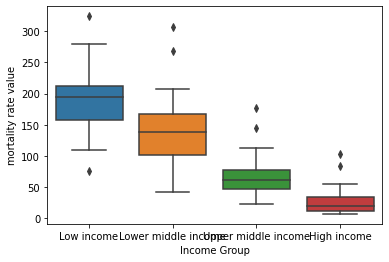

In [199]:
sns.boxplot(x='Income Group',y='mortality rate value',data=incomeleft)

## From this plot, we can say, lower income country will have higher mortality rate.

<h4>10.5</h4>
<p>At the start, we asked some questions. Based on your analysis, provide a short answer to each of these:</p>
<ol>
<li>Are we making any progress in reducing the amount of emitted pollutants across the globe?</li>
<li>Which are the critical regions where we should start environmental campaigns?</li>
<li>Are we making any progress in the prevention of deaths related to air pollution?</li>
<li>Which demographic characteristics seem to correlate with the number of health-related issues derived from air pollution? </li>
</ol>

**Answer.**

-------
## 1) In overall, we are making some progress in reducing the amount of emitted pollutant accross the globe, but it is not sufficient. This progress stop the increasing of the amount of gas emissions, but did not descrease the emissions rate significantly.

## 2) East Asia & Pacific and are the critical regions where we should start the environmental campaigns, because their missions rate is increasing rapidly. EUro and central Asia is the second regions.

## 3) Yes, they are, but it is only in most of high income countries. In low in income countries, there is no progress in the prevention of deaths related to pollution

## 4) Low income countries seem to correlate with the number of health-related issues.